In [1]:
import pandas as pd
%matplotlib inline

In [2]:
# Read data
data = pd.read_csv('kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## 1. Data Cleaning

In [3]:
#Check null values on individual columns
data["rbc"].isnull()

0       True
1       True
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Name: rbc, Length: 400, dtype: bool

In [4]:
#Count null values on individual columns
data["rbc"].isnull().sum()

152

### Missing values treatment

In [5]:
#Count null values on the whole data frame
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
#save null values
null_values = data.isnull().sum()

In [7]:
null_values

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

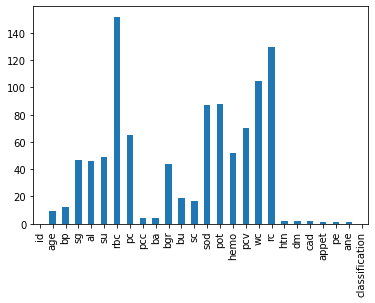

In [8]:
#plot null values
null_values.plot.bar();

In [9]:
#compare missing values across missing columns 
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [10]:
specific_columns_missing = (data[["al","su"]] == 0).sum()
specific_columns_missing 
#maybe add the percentage here. #introduction of NaN values... how this affects the analysis
#mind map of each step. Summary of the session at the begining. Create the summary in the notebook.


al    199
su    290
dtype: int64

<AxesSubplot:>

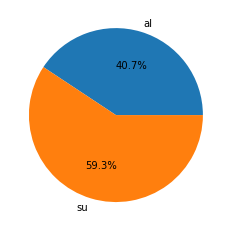

In [11]:
specific_columns_missing.plot.pie( 
    labels=["al","su"], 
    autopct='%1.1f%%',
    label = ""
)

### Null values treatment

In [12]:
num_missing = (data[data.columns] == 0).sum()
num_missing

id                  1
age                 0
bp                  0
sg                  0
al                199
su                290
rbc                 0
pc                  0
pcc                 0
ba                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [13]:
#get the size of samples
len(data.index)

400

In [14]:
#Plot missingness ratio
missing_data = data.isnull().sum(axis = 0)/len(data.index)

missing_data_df = pd.DataFrame(missing_data)

In [15]:
missing_data_df

,0
id,0.0000
age,0.0225
bp,0.0300
sg,0.1175
al,0.1150
su,0.1225
rbc,0.3800
pc,0.1625
pcc,0.0100
ba,0.0100


In [16]:
missing_data_df = missing_data_df.rename(columns={0: "ratio"})
missing_data_df

,ratio
id,0.0000
age,0.0225
bp,0.0300
sg,0.1175
al,0.1150
su,0.1225
rbc,0.3800
pc,0.1625
pcc,0.0100
ba,0.0100


In [17]:
import numpy as np
# Choose the names of the bars
bars =  missing_data_df.index
y_pos = np.arange(len(bars))

<BarContainer object of 26 artists>

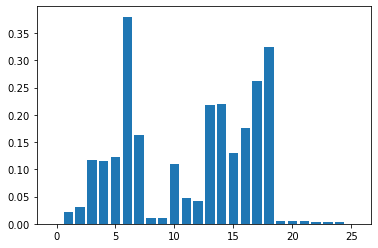

In [18]:
import matplotlib.pyplot as plt
plt.bar(y_pos, missing_data_df["ratio"])

In [19]:
y_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

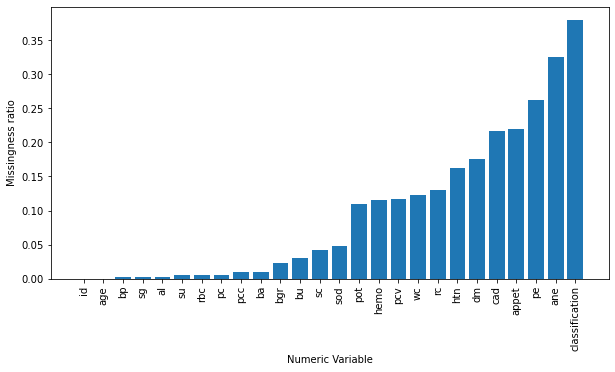

In [20]:
#Add this line to sort the graph
missing_data_df = missing_data_df.sort_values(by=["ratio"],ascending=True)

#plot it 
plt.figure(figsize=(10, 5))

# Create bars
plt.bar(y_pos, missing_data_df["ratio"])

# Create names on the x-axis
plt.xticks(y_pos, bars, color='black',rotation=90)
plt.yticks(color='black')
 
plt.xlabel('Numeric Variable') 
plt.ylabel('Missingness ratio')            
           
# Show graphic
plt.show()

### Introduce as different methods and explain the drawback of each method

In [21]:
#fill Null values with "Zeros"
data = pd.read_csv('./kidney_disease.csv')
data = data.fillna(0)
data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [22]:
data.count()

id                400
age               400
bp                400
sg                400
al                400
su                400
rbc               400
pc                400
pcc               400
ba                400
bgr               400
bu                400
sc                400
sod               400
pot               400
hemo              400
pcv               400
wc                400
rc                400
htn               400
dm                400
cad               400
appet             400
pe                400
ane               400
classification    400
dtype: int64

In [23]:
#Drop patients (rows) with one missing information
data = pd.read_csv('./kidney_disease.csv')
data = data.dropna(axis=0)
data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [24]:
data.count()

id                158
age               158
bp                158
sg                158
al                158
su                158
rbc               158
pc                158
pcc               158
ba                158
bgr               158
bu                158
sc                158
sod               158
pot               158
hemo              158
pcv               158
wc                158
rc                158
htn               158
dm                158
cad               158
appet             158
pe                158
ane               158
classification    158
dtype: int64

In [25]:
#Drop all columns containing at least one Null value
data = pd.read_csv('./kidney_disease.csv')
data = data.dropna(axis=1)
data.isnull().sum()

id                0
classification    0
dtype: int64

In [26]:
#almost all columns have been dropped
data.count()

id                400
classification    400
dtype: int64

In [28]:
#Add the mean of observed values as value of the missing ones
data.mean()
#Check mean to values
data = pd.read_csv('kidney_disease.csv')
data.mean()

/var/folders/sp/kkm21gnx469f0284w2ckt8lm0000gn/T/ipykernel_45549/4170437755.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()
/var/folders/sp/kkm21gnx469f0284w2ckt8lm0000gn/T/ipykernel_45549/4170437755.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


id      199.500000
age      51.483376
bp       76.469072
sg        1.017408
al        1.016949
su        0.450142
bgr     148.036517
bu       57.425722
sc        3.072454
sod     137.528754
pot       4.627244
hemo     12.526437
dtype: float64

In [29]:
#data.fillna('', inplace=True)
data = data.fillna(data.mean())
data.isnull().sum() 

/var/folders/sp/kkm21gnx469f0284w2ckt8lm0000gn/T/ipykernel_45549/1867017140.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [30]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [31]:
#check the unique values
data["rbc"].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

In [32]:
#Sample from the main dataframe
sample = data[["age","bp"]]

### Standardization

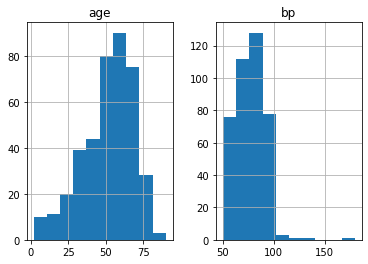

In [33]:
sample.hist()
plt.show()

In [34]:
sample.head(5)

,age,bp
0,48.0,80.0
1,7.0,50.0
2,62.0,80.0
3,48.0,70.0
4,51.0,80.0


In [35]:
# Scale data
from sklearn import preprocessing
sample_scaled = pd.DataFrame(preprocessing.scale(sample),columns=["age","bp"])

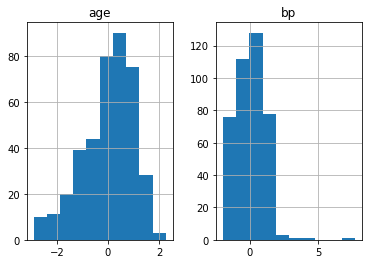

In [36]:
sample_scaled.hist();
#try this now
#sample_scaled.hist(range=[-8,8])

### Filtering

In [37]:
data["classification"].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [38]:
data.loc[data["classification"] == "ckd\t"] = "ckd"

In [39]:
data["classification"].unique()

array(['ckd', 'notckd'], dtype=object)

In [40]:
data_ckd = data[data["classification"]=="ckd"]

## 2. Univariate Analysis

### Types of Variables

In [41]:
#load and fill missing numeric values with the mean
data = pd.read_csv('./kidney_disease.csv')
data = data.fillna(data.mean())
data = data.fillna("")
#data.loc[data["classification"] == "ckd\t"] = "ckd"
#correct some misspelling of classes
#data[data["classification"]=="ckd\t"] = "ckd"
#data[data["classification"]=="cdk"]   = "ckd"
data.isnull().sum()

/var/folders/sp/kkm21gnx469f0284w2ckt8lm0000gn/T/ipykernel_45549/295003130.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [42]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [43]:
data["age"].unique()

array([48.        ,  7.        , 62.        , 51.        , 60.        ,
       68.        , 24.        , 52.        , 53.        , 50.        ,
       63.        , 40.        , 47.        , 61.        , 21.        ,
       42.        , 75.        , 69.        , 51.48337596, 73.        ,
       70.        , 65.        , 76.        , 72.        , 82.        ,
       46.        , 45.        , 35.        , 54.        , 11.        ,
       59.        , 67.        , 15.        , 55.        , 44.        ,
       26.        , 64.        , 56.        ,  5.        , 74.        ,
       38.        , 58.        , 71.        , 34.        , 17.        ,
       12.        , 43.        , 41.        , 57.        ,  8.        ,
       39.        , 66.        , 81.        , 14.        , 27.        ,
       83.        , 30.        ,  4.        ,  3.        ,  6.        ,
       32.        , 80.        , 49.        , 90.        , 78.        ,
       19.        ,  2.        , 33.        , 36.        , 37.  

<AxesSubplot:>

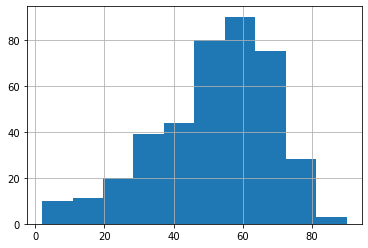

In [44]:
data.age.hist()

/Users/amangupta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amangupta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amangupta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

<AxesSubplot:xlabel='hemo', ylabel='Density'>

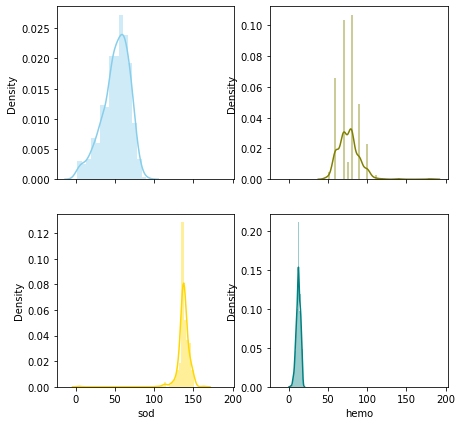

In [45]:
# library and data
import seaborn as sns
 
# plot
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( data["age"] , color="skyblue", ax=axes[0, 0])
sns.distplot( data["bp"] , color="olive", ax=axes[0, 1])
sns.distplot( data["sod"] , color="gold", ax=axes[1, 0])
sns.distplot( data["hemo"] , color="teal", ax=axes[1, 1])

### Univariate Analysis on Categorical variables

<AxesSubplot:xlabel='count', ylabel='htn'>

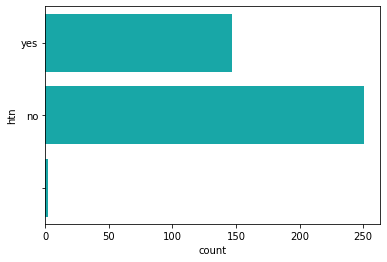

In [46]:
sns.countplot(y="htn", data=data, color="c")

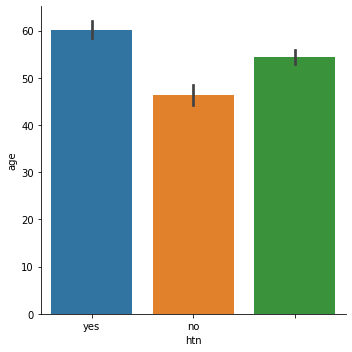

In [47]:
# library and data

#try this
#data.loc[data["htn"] == None] = 0
# plot
sns.catplot(x="htn", y="age",  kind="bar", data=data)

In [48]:
data["htn"].unique()

array(['yes', 'no', ''], dtype=object)

### Univariate Analysis on Quantitative variables

### Types of charts to use

In [49]:
data['classification'] = data['classification'].replace('ckd\t', 'ckd')

In [50]:
data['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [51]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

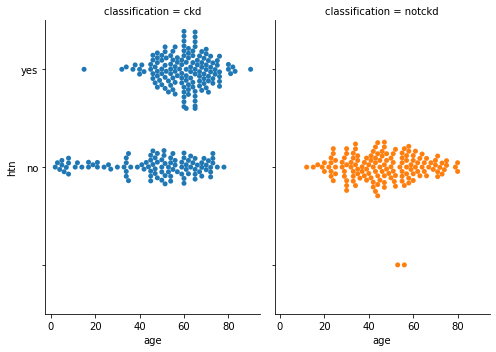

In [52]:
sns.catplot(x="age", y="htn", hue="classification",
            col="classification", aspect=.7,
            kind="swarm", data=data)

In [53]:
data["htn"].unique()

data["htn"].replace('', np.nan, inplace=True)

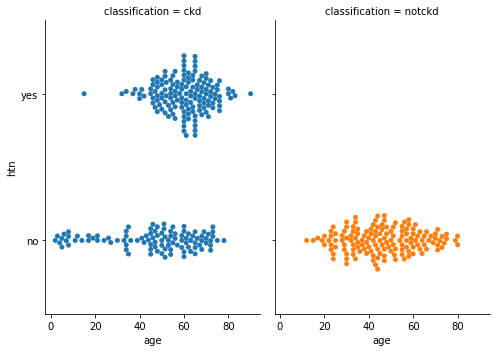

In [54]:

sns.catplot(x="age", y="htn", hue="classification",
            col="classification", aspect=.7,
            kind="swarm", data=data)

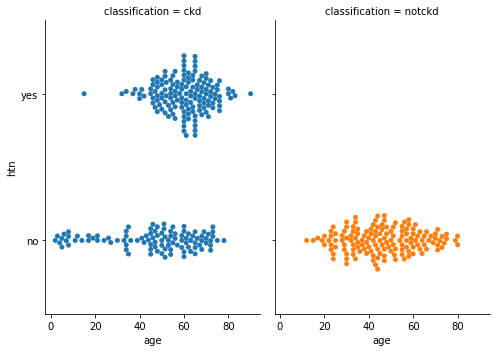

In [55]:
sns.catplot(x="age", y="htn", hue="classification",
            col="classification", aspect=.7,
            kind="swarm", data=data)

### Summary metrics

In [56]:
#categorical
data["htn"].describe()

count     398
unique      2
top        no
freq      251
Name: htn, dtype: object

In [57]:
#numeric
data["age"].describe()

count    400.000000
mean      51.483376
std       16.974966
min        2.000000
25%       42.000000
50%       54.000000
75%       64.000000
max       90.000000
Name: age, dtype: float64

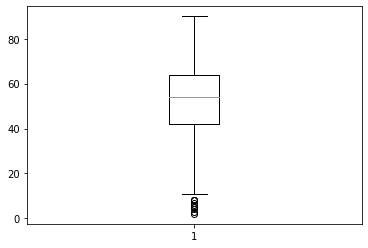

In [58]:
#numeric boxplot
#numeric
plt.boxplot(data["age"]);

## 3. Segmented Univariate Analysis

### Segmentation techniques (box plots)

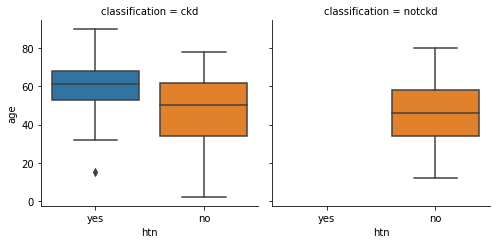

In [59]:
g = sns.catplot(x="htn", 
                y="age", 
                col="classification", #this is the segment
                kind="box", 
                height=3.5, 
                data=data)

### Comparing across categories: mean and median.

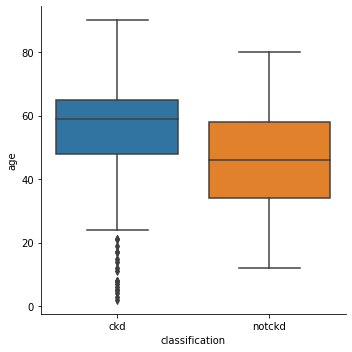

In [60]:
sns.catplot(x="classification", 
            y="age", 
            kind="box", 
            data=data)

## 4. Bivariate and Multivariate Analysis

### Correlation matrix, bivariate analysis on continuous and categorical variables

### Scater plot between two variables

In [61]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [62]:
data.head(5)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,,normal,notpresent,notpresent,...,38,6000,,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


### Scatter plot

<AxesSubplot:xlabel='age', ylabel='bp'>

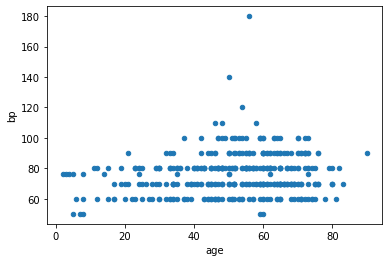

In [63]:
data.plot.scatter(x='age', y='bp')

### Hexplot

<AxesSubplot:xlabel='bp', ylabel='age'>

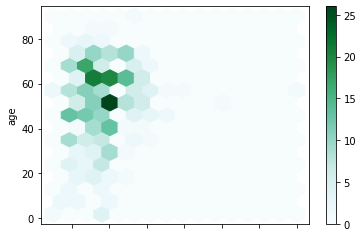

In [64]:
data.plot.hexbin(x='bp', y='age', gridsize=15)

### Scatter matrix

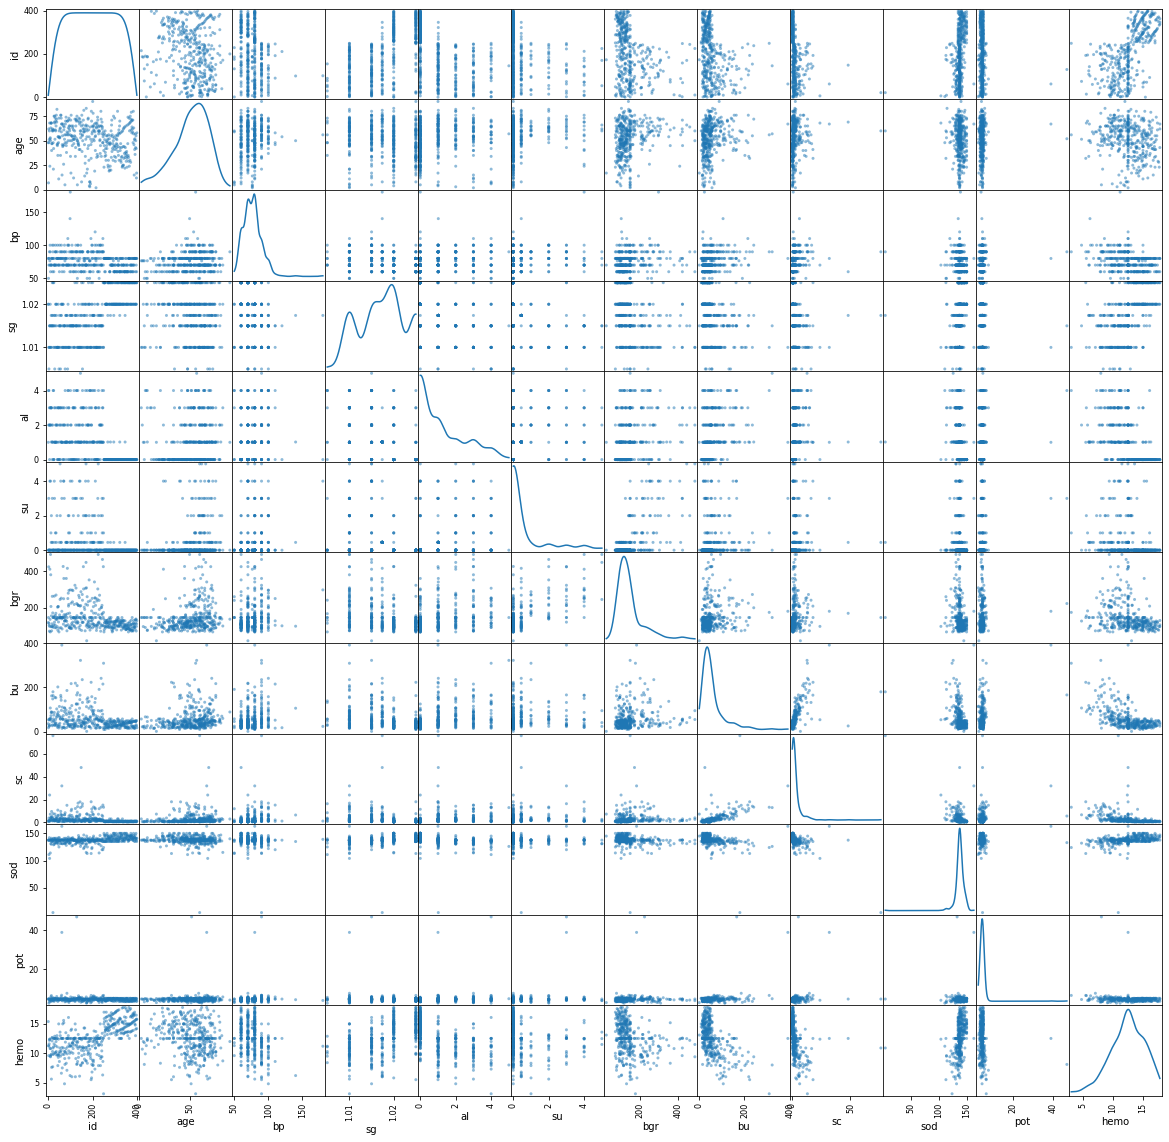

In [65]:
spd = pd.plotting.scatter_matrix(data, 
                                 figsize=(20,20), 
                                 diagonal="kde"
                                 )

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

In [67]:
data.iloc[:, 1:26]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,,normal,notpresent,notpresent,121.000000,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,,normal,notpresent,notpresent,148.036517,...,38,6000,,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31,7500,,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,51,7200,5.9,no,no,no,good,no,no,notckd


### Correlation plot

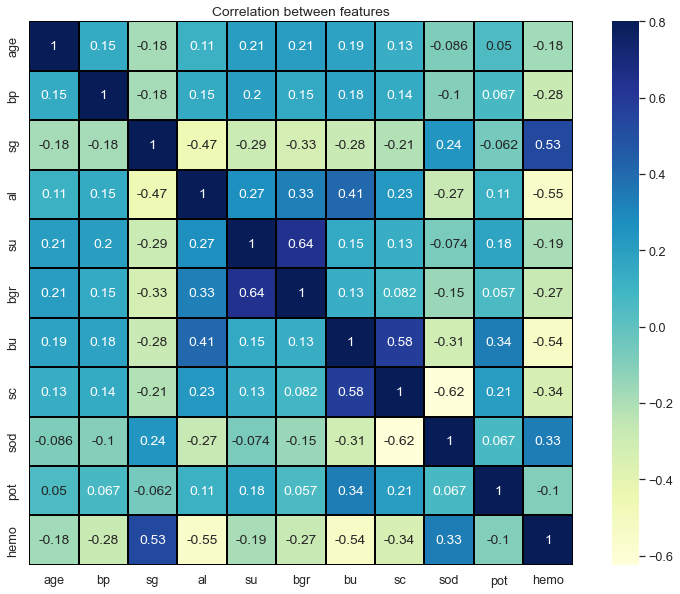

In [68]:
corr=data.iloc[:, 1:26].corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,
            annot=True,
            cmap='YlGnBu',
            linecolor="black")
plt.title('Correlation between features');